# napari-imagegrains Processing Segmentation Performance

This widget tab allows you to compute segmentation performance upon image segmentation. You can open it via `Plugins -> ImageGrains -> ImageGrain Processing Widget` and then switch to `Performance`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import napari
from napari_imagegrains.imgr_proc_widget import ImageGrainProcWidget
from napari_imagegrains.imgr_demodata_widget import ImageGrainDemoWidget
from pathlib import Path
import os
import shutil

---

## Data preparation

In [3]:
demodata_folder = Path.home().joinpath("imagegrains/")
if demodata_folder.exists() and demodata_folder.is_dir():
    shutil.rmtree(demodata_folder)

In [4]:
viewer = napari.Viewer()
demo_widget = ImageGrainDemoWidget(viewer=viewer)
demo_widget._on_click_download_demodata()

self = demo_widget.widget

"""
viewer = napari.Viewer()
self = ImageGrainProcWidget(viewer=viewer)
viewer.window.add_dock_widget(self);
"""

'\nviewer = napari.Viewer()\nself = ImageGrainProcWidget(viewer=viewer)\nviewer.window.add_dock_widget(self);\n'

In [5]:
exports_folder = Path.home().joinpath("imagegrains/exports/")
if not exports_folder.exists():
    os.makedirs(exports_folder, exist_ok=True)

In [6]:
self.pred_directory.set_value(exports_folder)

In [7]:
self.image_folder = Path.home().joinpath("imagegrains/demo_data/FH/train/")

---

## Compute performance on individual image

In order to compute the segmentation performance, two items are required: a `reference segmentation mask` (that can be generated manually) and a `prediction mask` generated by the segmentation algorithm. The demodata contains reference masks. If you want to use these, click on `Select image folder`and navigate to your home directory (C:/User/Username/) and then to the `imagegrains -> demo_data -> FH -> train` folder. Here, the demo images (.jpgs) and their corresponding reference masks (.tifs) are stored. 

Select the first `jpeg` image, make shure the `Save prediction(s)` checkbox is checked and click on `Run segmentation on selected image`. This operation is required for the next step. It generates a prediction mask and saves it in your export folder.  

In [8]:
self.viewer.layers.clear()

In [9]:
self.image_list.update_from_path(self.image_folder)
self.image_list.setCurrentRow(0)

In [10]:
self.check_save_mask.setChecked(True)
self._on_click_segment_single_image()

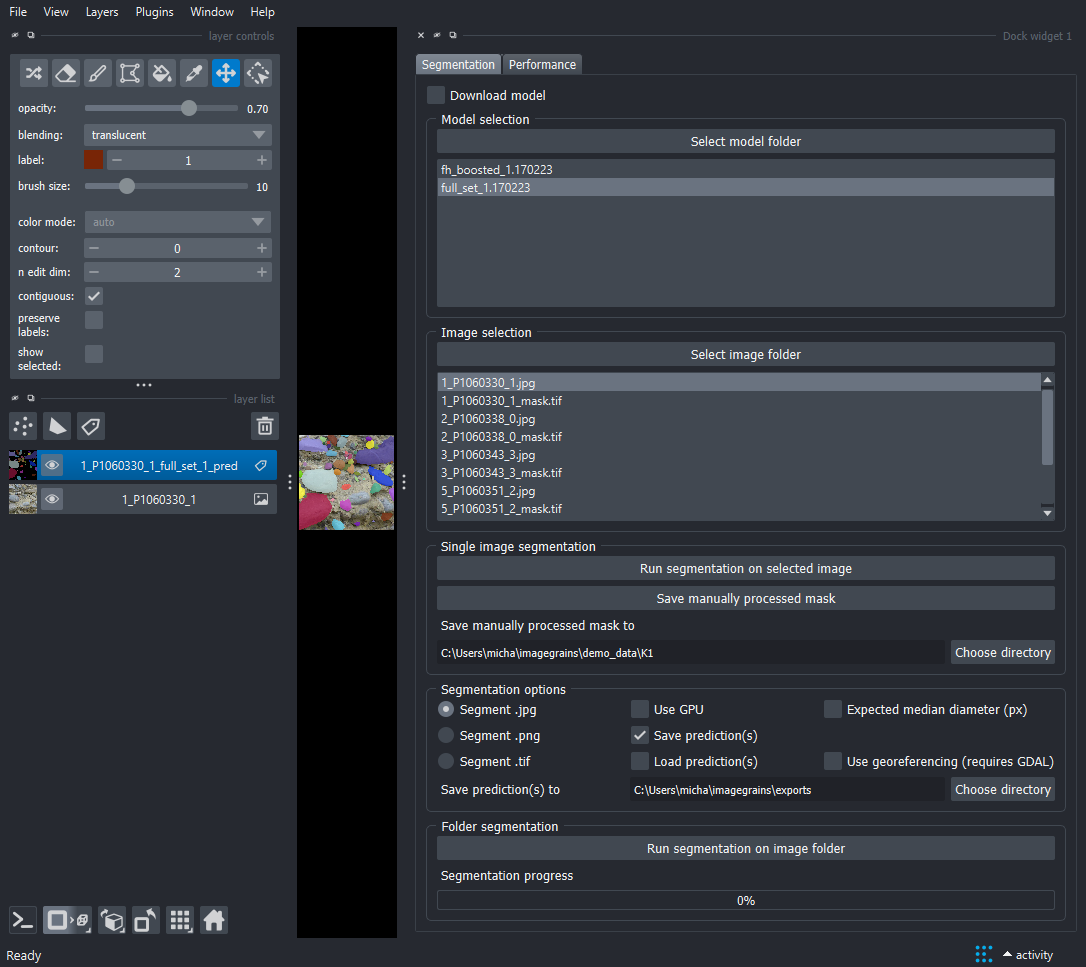

In [11]:
napari.utils.NotebookScreenshot(viewer)

Click on the `Performance` tab at the top of the widget to switch the view. For the `Pick predictions folder` field, select the directory in which the prediction mask you just generated is stored. For the `Pick mask folder` field, select the image folder with the reference masks. Click on `Compute performance single image` to generate the precision plot for the image that has been just segmented.  

C:\Users\micha\anaconda3\envs\napari-imgr4-osgeo\Lib\site-packages\imagegrains\plotting.py:92: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


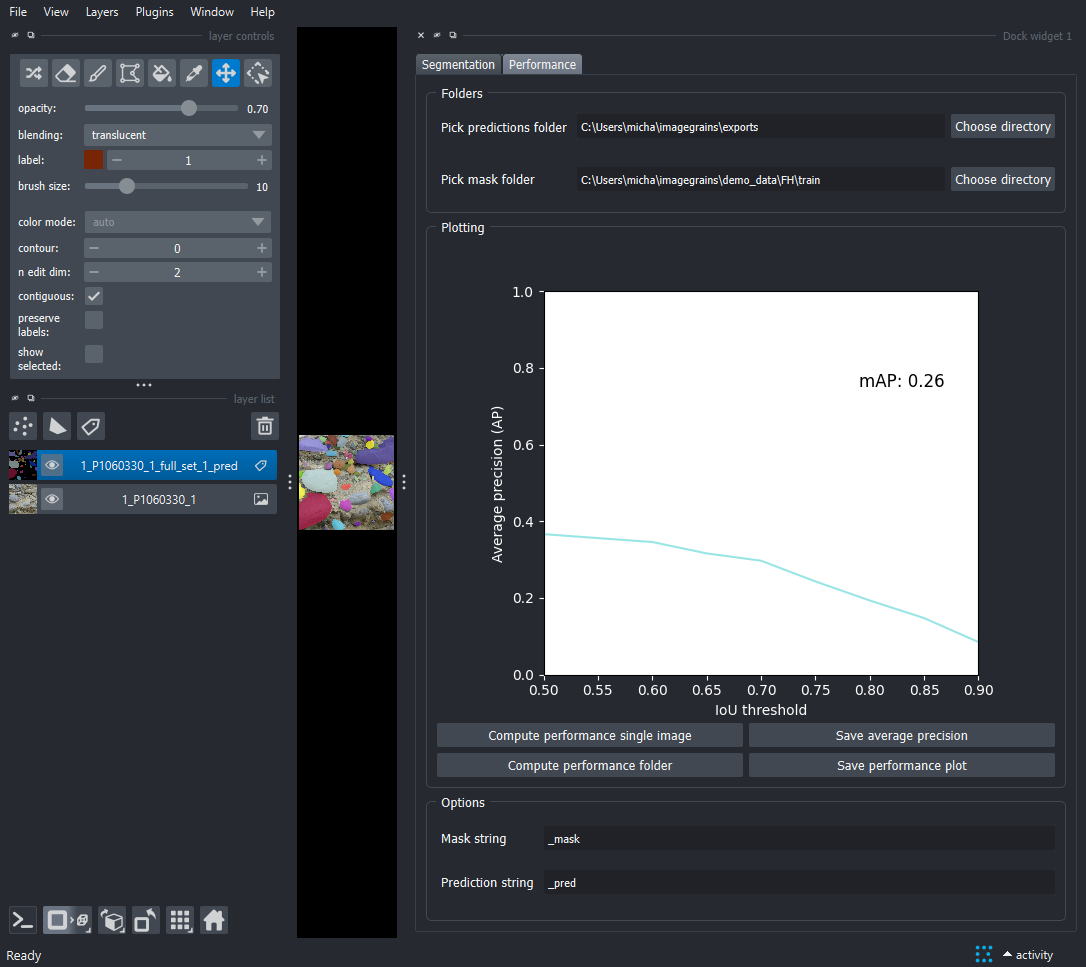

In [12]:
self.tabs.setCurrentIndex(1)
self.perf_pred_directory.set_value(self.pred_directory.value)
self.perf_mask_directory.set_value(self.image_folder)
self._on_click_compute_performance_single_image()
napari.utils.NotebookScreenshot(viewer)

---

## Compute performance on image folder

If you want to compute the segmentation performance on multiple pairs of reference and prediction masks, you need to click on `Run segmentation on image folder` first and save the prediction masks in your export folder. 

In [13]:
self.tabs.setCurrentIndex(0)
self.viewer.layers.clear()
self.image_list.update_from_path(self.image_folder)
self.image_list.setCurrentRow(0)

In [14]:
self.viewer.layers.clear()
self.check_save_mask.setChecked(True)
self._on_click_segment_image_folder()

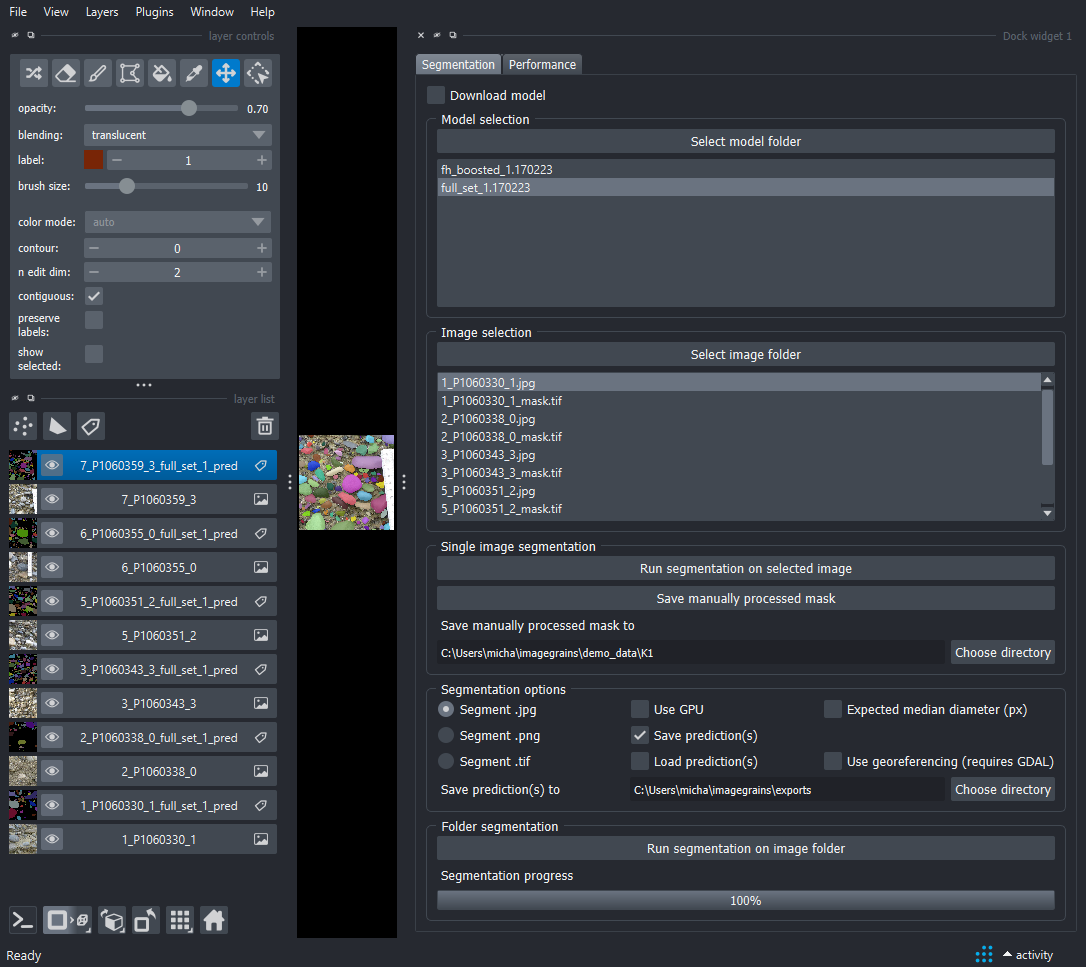

In [15]:
napari.utils.NotebookScreenshot(viewer)

Again, click on the `Performance` tab at the top of the widget to switch the view. Now click on `Compute performance folder` to obtain a more complex plot. This plot displays individual performance information as well as statistical information about the overall segmentation performance.

In [16]:
self.tabs.setCurrentIndex(1)
self.perf_pred_directory.set_value(self.pred_directory.value)
self.perf_mask_directory.set_value(self.image_folder)
self._on_click_compute_performance_folder()

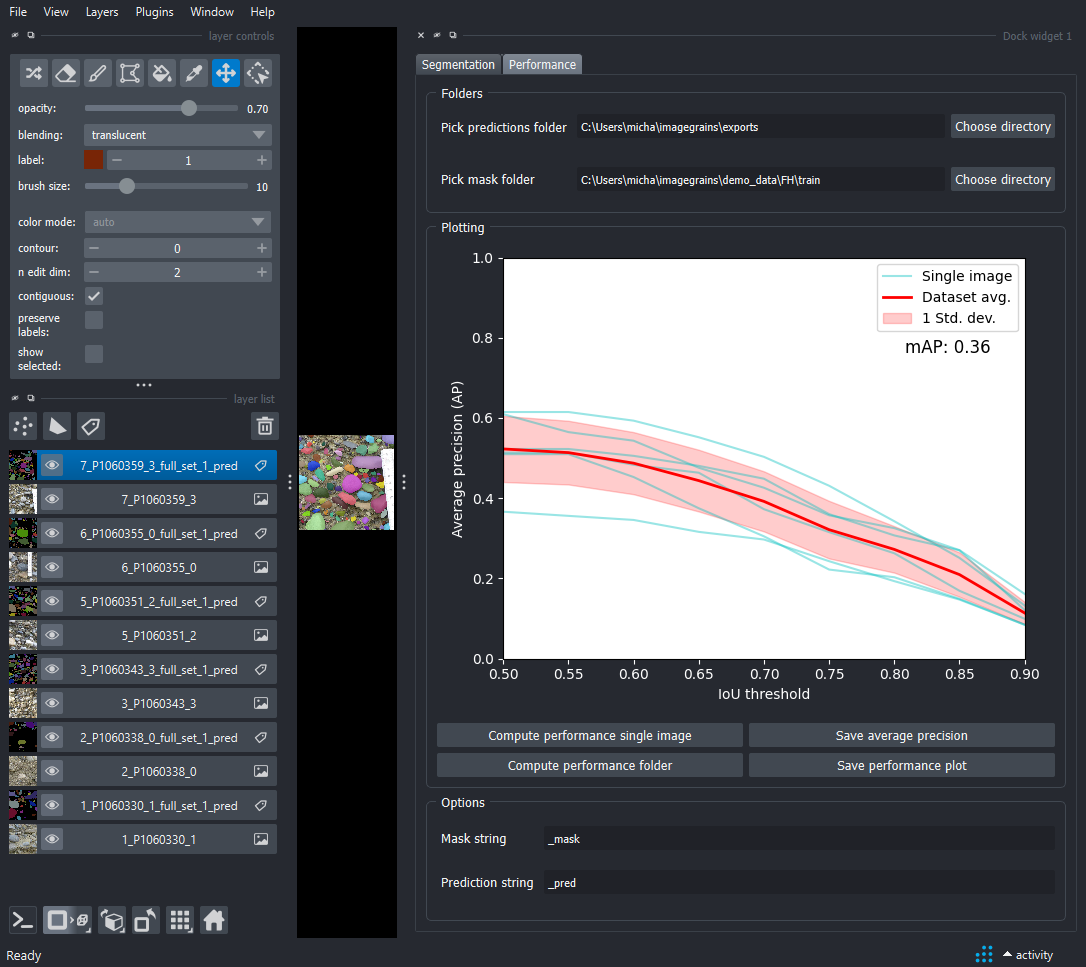

In [17]:
napari.utils.NotebookScreenshot(viewer)

---

## Options

In the options section you can customize recognition strings in the file name(s) of your reference and prediction mask(s). By default, reference masks file names contain the string `_mask` whereas the predicted masks file names contain the string `_pred`. Change theese strings according to your requirements.

---

## Save computed parameters

By clicking on `Save average precision` or `Save performance plot` you can save the computation results in your export folder.

In [18]:
self._on_save_performance_plot()

In [19]:
self._on_save_average_precision()